### Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
from tqdm.notebook import trange, tqdm
from glob import glob
from sklearn.model_selection import train_test_split

---------------------------------

## Leitura do Dataset

In [2]:
df = pd.read_csv('../database/credit_card_transactions.csv')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


------------------------------

## Descrição do Dataset

In [4]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
merch_zipcode            float64
dtype: object

In [5]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


In [6]:
df.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

In [7]:
df.duplicated().sum()

0

---------------------------------

## Tratamento da Base

### Tratamento de Dados Faltantes:

In [8]:
df.drop(columns=['Unnamed: 0', 'merch_zipcode'], inplace=True)
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


### Tratamento de Tipos de Dados:

* Dados categóricos:

In [10]:
columns = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob']

for column in columns:
    print('{}: {}'.format(column, len(df[column].unique())))

merchant: 693
category: 14
first: 352
last: 481
gender: 2
street: 983
city: 894
state: 51
job: 494
dob: 968


In [13]:
columns = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob']

for column in columns:
    df[column] = df[column].astype('category').cat.codes
     
df[columns]

,merchant,category,first,last,gender,street,city,state,job,dob
0,514,8,162,18,0,568,526,27,370,779
1,241,4,309,157,0,435,612,47,428,607
2,390,0,115,381,1,602,468,13,307,302
3,360,2,163,463,1,930,84,26,328,397
4,297,9,336,149,1,418,216,45,116,734
...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,121,332,1,154,330,44,215,298
1296671,2,1,160,463,1,856,813,20,360,630
1296672,599,1,74,67,1,158,346,32,308,412
1296673,509,1,179,304,1,433,471,41,485,639


* Tratando datas:

In [18]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time']).dt.date
df['trans_date_trans_time']

0          2019-01-01
1          2019-01-01
2          2019-01-01
3          2019-01-01
4          2019-01-01
              ...    
1296670    2020-06-21
1296671    2020-06-21
1296672    2020-06-21
1296673    2020-06-21
1296674    2020-06-21
Name: trans_date_trans_time, Length: 1296675, dtype: object

### Removendo colunas desnecessárias:

In [20]:
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                   int16
category                    int8
amt                      float64
first                      int16
last                       int16
gender                      int8
street                     int16
city                       int16
state                       int8
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                        int16
dob                        int16
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

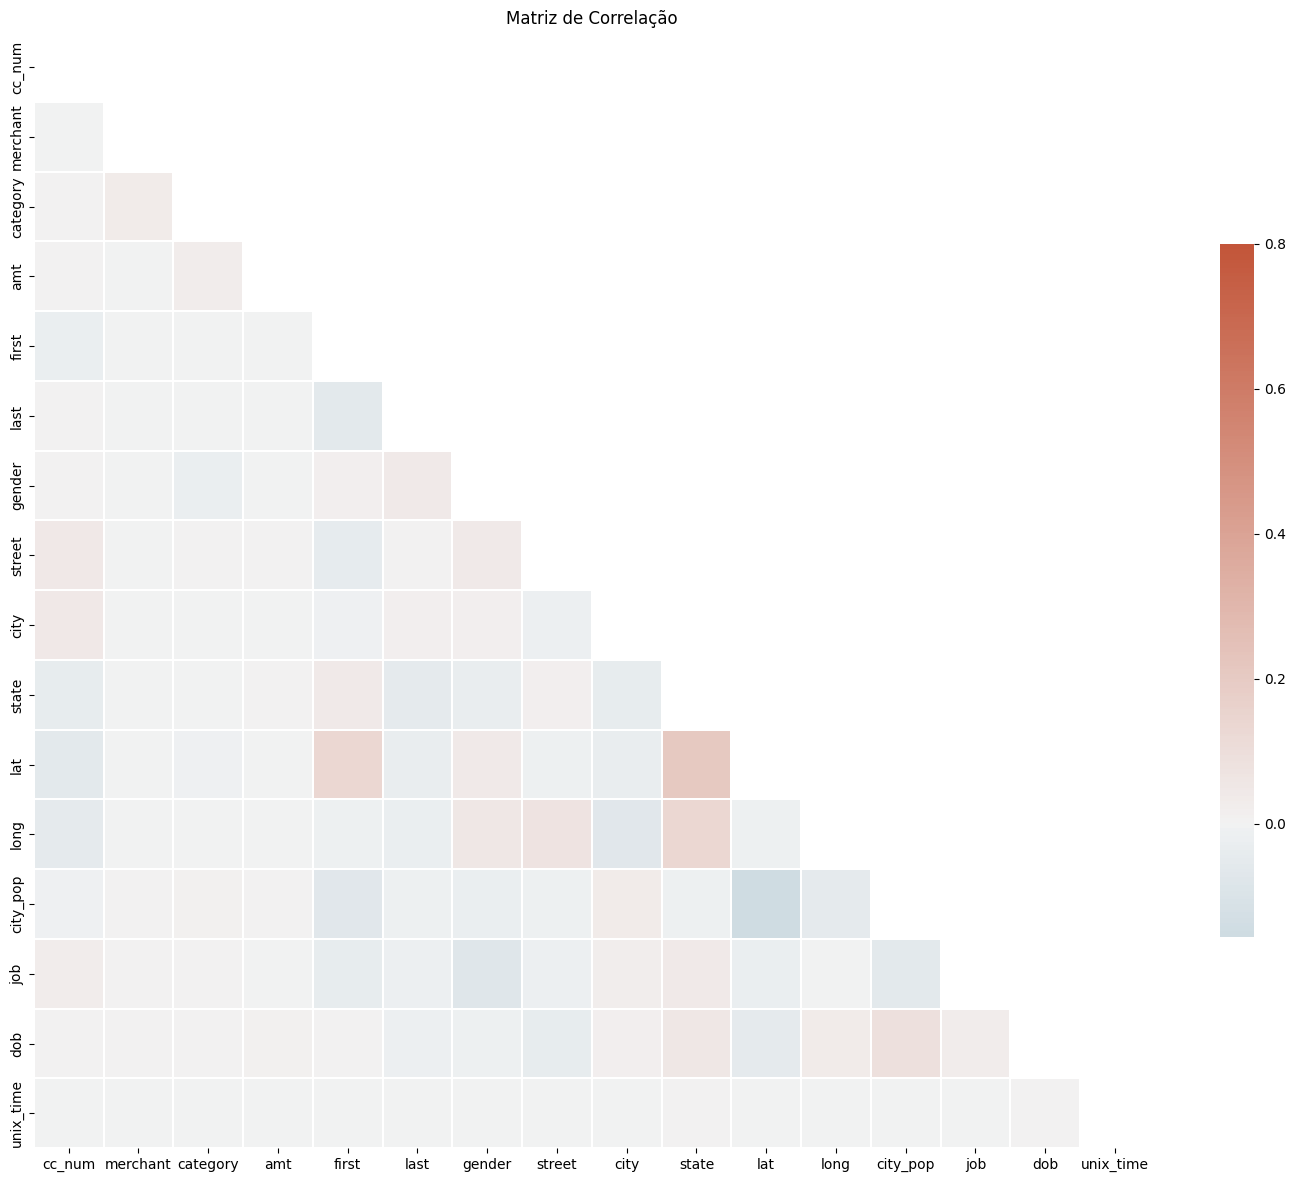

In [24]:
df_corr = df.drop(columns=['trans_date_trans_time', 'trans_num', 'is_fraud'])
corr = df_corr.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
                square=True, linewidths=.3, cbar_kws={"shrink": .5})

plt.title('Matriz de Correlação')
plt.show()

In [23]:
df = df.drop(columns=['merch_lat', 'merch_long', 'zip'])

In [28]:
df = df.drop(columns=['cc_num', 'first', 'last'])

### Normalizando Dados

In [30]:
df

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,is_fraud
0,2019-01-01,514,8,4.97,0,568,526,27,36.0788,-81.1781,3495,370,779,0b242abb623afc578575680df30655b9,1325376018,0
1,2019-01-01,241,4,107.23,0,435,612,47,48.8878,-118.2105,149,428,607,1f76529f8574734946361c461b024d99,1325376044,0
2,2019-01-01,390,0,220.11,1,602,468,13,42.1808,-112.2620,4154,307,302,a1a22d70485983eac12b5b88dad1cf95,1325376051,0
3,2019-01-01,360,2,45.00,1,930,84,26,46.2306,-112.1138,1939,328,397,6b849c168bdad6f867558c3793159a81,1325376076,0
4,2019-01-01,297,9,41.96,1,418,216,45,38.4207,-79.4629,99,116,734,a41d7549acf90789359a9aa5346dcb46,1325376186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21,499,0,15.56,1,154,330,44,37.7175,-112.4777,258,215,298,440b587732da4dc1a6395aba5fb41669,1371816728,0
1296671,2020-06-21,2,1,51.70,1,856,813,20,39.2667,-77.5101,100,360,630,278000d2e0d2277d1de2f890067dcc0a,1371816739,0
1296672,2020-06-21,599,1,105.93,1,158,346,32,32.9396,-105.8189,899,308,412,483f52fe67fabef353d552c1e662974c,1371816752,0
1296673,2020-06-21,509,1,74.90,1,433,471,41,43.3526,-102.5411,1126,485,639,d667cdcbadaaed3da3f4020e83591c83,1371816816,0


In [31]:
columns = df.columns if 'trans_date_trans_time' not in df.columns
columns

SyntaxError: expected 'else' after 'if' expression (2182290101.py, line 1)

--------------------------------------

## Salvando Base de Dados

In [25]:
df.to_csv('../data/processed_dataset.csv', index=False)